# Лабораторная работа 1. Деревья классификации
Задача: 12. Revenue

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import *

%matplotlib inline

/home/worker/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/worker/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/worker/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  Deprecati

In [2]:
data = pd.read_excel('data/доход(12).xls', skipinitialspace=True, )

In [3]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,<=50K
1,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
2,20,Private,148294,Some-college,10,Never-married,Other-service,Own-child,White,Male,40,United-States,<=50K
3,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,65,United-States,>50K
4,38,State-gov,343642,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,United-States,>50K
5,23,Local-gov,115244,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,60,United-States,<=50K
6,31,Private,162572,HS-grad,9,Never-married,Other-service,Own-child,White,Male,16,United-States,<=50K
7,58,Private,356067,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
8,66,Private,271567,HS-grad,9,Separated,Machine-op-inspct,Not-in-family,Black,Male,40,United-States,<=50K
9,39,Self-emp-inc,180804,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [4]:
data.rename(columns={n:n.strip() for n in data.columns}, inplace=True)
for c in data.columns:
    if data[c].dtype != np.dtype('O'): continue
    data[c] = data[c].str.strip()

In [5]:
data.rename(columns={'sex': 'male'}, inplace=True)

In [6]:
data['male'] = 1 * (data['male'] == 'Male')

In [7]:
data['income'].value_counts()

<=50K    733
>50K     268
Name: income, dtype: int64

In [8]:
data['income_gt50'] = 1 * (data['income'] == '>50K')

In [9]:
X_train = data.iloc[:,:-1].drop('income', axis=1)
y_train = data.iloc[:,-1]

In [10]:
display(X_train.head(), y_train.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,male,hours-per-week,native-country
0,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States
1,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,50,United-States
2,20,Private,148294,Some-college,10,Never-married,Other-service,Own-child,White,1,40,United-States
3,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,1,65,United-States
4,38,State-gov,343642,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,0,40,United-States


0    0
1    1
2    0
3    1
4    1
Name: income_gt50, dtype: int64

In [11]:
X_train.race.value_counts()

White                 849
Black                 111
Asian-Pac-Islander     32
Amer-Indian-Eskimo      6
Other                   3
Name: race, dtype: int64

In [12]:
X_train.workclass.value_counts()

Private             684
Self-emp-not-inc     74
Local-gov            67
?                    61
Self-emp-inc         45
State-gov            40
Federal-gov          29
Without-pay           1
Name: workclass, dtype: int64

In [13]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'male',
       'hours-per-week', 'native-country'],
      dtype='object')

In [14]:
cat_feats = ['workclass', 'education', 'marital-status',
             'occupation', 'relationship', 'race', 'native-country']
lencs = dict()
bnrzs = dict()
bnrzd = dict()

In [15]:
for f in cat_feats:
    lencs[f] = preprocessing.LabelEncoder().fit(X_train[f])
    X_train.loc[:,f] = lencs[f].transform(X_train[f])
    bnrzs[f] = preprocessing.LabelBinarizer().fit(X_train.loc[:,f])
    bnrzd[f] = bnrzs[f].transform(X_train[f])
    bnrzd[f] = pd.DataFrame(bnrzd[f], columns=[X_train[f].name + str(n) for n in bnrzs[f].classes_])

X_train.drop(cat_feats, axis=1, inplace=True)
X_train = pd.concat([X_train] + list(bnrzd.values()), axis=1)

In [16]:
X_train.columns

Index(['age', 'fnlwgt', 'education-num', 'male', 'hours-per-week',
       'workclass0', 'workclass1', 'workclass2', 'workclass3', 'workclass4',
       'workclass5', 'workclass6', 'workclass7', 'education0', 'education1',
       'education2', 'education3', 'education4', 'education5', 'education6',
       'education7', 'education8', 'education9', 'education10', 'education11',
       'education12', 'education13', 'education14', 'marital-status0',
       'marital-status1', 'marital-status2', 'marital-status3',
       'marital-status4', 'marital-status5', 'marital-status6', 'occupation0',
       'occupation1', 'occupation2', 'occupation3', 'occupation4',
       'occupation5', 'occupation6', 'occupation7', 'occupation8',
       'occupation9', 'occupation10', 'occupation11', 'occupation12',
       'occupation13', 'occupation14', 'relationship0', 'relationship1',
       'relationship2', 'relationship3', 'relationship4', 'relationship5',
       'race0', 'race1', 'race2', 'race3', 'race4', 'nati

In [17]:
X_train.head()

,age,fnlwgt,education-num,male,hours-per-week,workclass0,workclass1,workclass2,workclass3,workclass4,...,native-country20,native-country21,native-country22,native-country23,native-country24,native-country25,native-country26,native-country27,native-country28,native-country29
0,40,82465,10,1,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,39,329980,13,1,50,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,20,148294,10,1,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,50,168212,16,1,65,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,38,343642,9,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(
    X_train,
    y_train,
    train_size=.75)

/home/worker/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We might want to increase the weight of $1$-class in order to improve its recall,
i.e. to increase $$Pr\left(\mathrm{predict}\ 1\ {\big\vert}\ \mathrm{is}\ 1\right).$$

That depends on available means to check the customer.

In [19]:
dtclf = model_selection.GridSearchCV(
    tree.DecisionTreeClassifier(
        criterion='gini',
        splitter='best',
    ),
    [
        {
            'max_depth': [2, 3, 4, 5, 6, 8, 16, 32],
            'class_weight': [{0: 1, 1: t} for t in np.arange(start=.5, stop=3.01, step=1)],
        },
        {
            'min_samples_split': [5, 10, 30, 50, 75, 100, 200],
            'class_weight': [{0: 1, 1: t} for t in np.arange(start=.5, stop=3.01, step=1)],
        },
    ],
    scoring=['f1', 'neg_log_loss', 'accuracy', 'roc_auc'],
    refit='neg_log_loss'
)

In [20]:
dtclf.fit(X_tr, y_tr)

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [2, 3, 4, 5, 6, 8, 16, 32], 'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 1.5}, {0: 1, 1: 2.5}]}, {'min_samples_split': [5, 10, 30, 50, 75, 100, 200], 'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 1.5}, {0: 1, 1: 2.5}]}],
       pre_dispatch='2*n_jobs', refit='neg_log_loss',
       return_train_score='warn',
       scoring=['f1', 'neg_log_loss', 'accuracy', 'roc_auc'], verbose=0)

In [21]:
dtclf.best_params_

{'class_weight': {0: 1, 1: 1.5}, 'max_depth': 2}

In [22]:
def show_scorings(clf, X, y):
    for score in [
        metrics.accuracy_score,
        metrics.log_loss,
        metrics.f1_score,
        metrics.explained_variance_score,
        metrics.mutual_info_score,
        metrics.classification.cohen_kappa_score,
        metrics.precision_score,
        metrics.recall_score,
    ]:
        yhat = clf.predict(X)
        print('%s score:\t %s' % (score.__name__,
                                    score(y, yhat)))

In [23]:
show_scorings(dtclf, X_tr, y_tr)

accuracy_score score:	 0.753333333333
log_loss score:	 8.51973222647
f1_score score:	 0.656771799629
explained_variance_score score:	 -0.0929424927277
mutual_info_score score:	 0.141872444432
cohen_kappa_score score:	 0.480939732894
precision_score score:	 0.52994011976
recall_score score:	 0.863414634146


In [24]:
dtclf.score(X_tr, y_tr)

-0.44676551599480097

In [25]:
dtclf.score(X_te, y_te)

-0.42750977694791559

In [26]:
chi2score = pd.DataFrame(
    np.c_[(X_tr.columns, *feature_selection.chi2(X_tr, y_tr))],
    columns=['var', 'chi2', 'chi2pval'])
chi2score.sort_values('chi2pval').head(20)

,var,chi2,chi2pval
1,fnlwgt,73704.2,0
4,hours-per-week,156.964,5.21345e-36
0,age,154.097,2.20614e-35
30,marital-status2,81.4258,1.81968e-19
50,relationship0,62.1011,3.26262e-15
32,marital-status4,55.9735,7.34549e-14
53,relationship3,34.2294,4.89844e-09
2,education-num,33.8732,5.88223e-09
51,relationship1,29.8196,4.74179e-08
9,workclass4,29.8176,4.74665e-08


In [27]:
chi2feats = chi2score.loc[chi2score['chi2pval'] <= 1e-4, 'var']

In [28]:
dtclf.fit(X_tr[chi2feats], y_tr)

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [2, 3, 4, 5, 6, 8, 16, 32], 'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 1.5}, {0: 1, 1: 2.5}]}, {'min_samples_split': [5, 10, 30, 50, 75, 100, 200], 'class_weight': [{0: 1, 1: 0.5}, {0: 1, 1: 1.5}, {0: 1, 1: 2.5}]}],
       pre_dispatch='2*n_jobs', refit='neg_log_loss',
       return_train_score='warn',
       scoring=['f1', 'neg_log_loss', 'accuracy', 'roc_auc'], verbose=0)

In [29]:
dtclf.best_score_

-0.46832453371272231

In [30]:
display(
    dtclf.score(X_tr[chi2feats], y_tr),
    dtclf.score(X_te[chi2feats], y_te),
)

-0.44676551599480097

-0.42750977694791559

In [31]:
show_scorings(dtclf, X_tr[chi2feats], y_tr)

accuracy_score score:	 0.753333333333
log_loss score:	 8.51973222647
f1_score score:	 0.656771799629
explained_variance_score score:	 -0.0929424927277
mutual_info_score score:	 0.141872444432
cohen_kappa_score score:	 0.480939732894
precision_score score:	 0.52994011976
recall_score score:	 0.863414634146


In [32]:
show_scorings(dtclf, X_te[chi2feats], y_te)

accuracy_score score:	 0.764940239044
log_loss score:	 8.11883580546
f1_score score:	 0.646706586826
explained_variance_score score:	 -0.108409321175
mutual_info_score score:	 0.141642174159
cohen_kappa_score score:	 0.486030611182
precision_score score:	 0.519230769231
recall_score score:	 0.857142857143


In [33]:
print(metrics.classification_report(y_te, dtclf.predict(X_te[chi2feats])))

             precision    recall  f1-score   support

          0       0.94      0.73      0.82       188
          1       0.52      0.86      0.65        63

avg / total       0.83      0.76      0.78       251



In [34]:
t = dtclf.best_estimator_

In [35]:
import graphviz

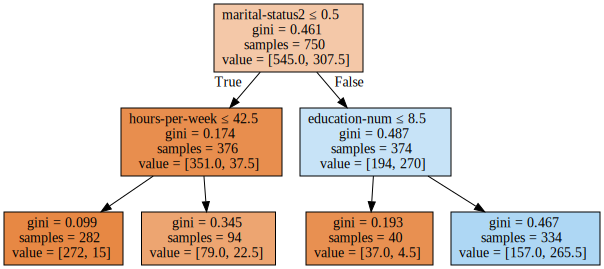

In [36]:
clfdot = tree.export_graphviz(
    dtclf.best_estimator_,
    out_file=None,
    feature_names=chi2feats.values,
    filled=True,
    special_characters=True
)
graphviz.Source(clfdot)